In [1]:
import pandas as pd

In [2]:
!pip install ultralytics
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import  display
display.clear_output()
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import glob

from PIL import Image

In [3]:
model = YOLO("yolov10s.pt")


In [4]:
import yaml
with open("data.yaml",'r') as f:
    data=yaml.safe_load(f)
    print(data['names'])

['BUS LANE', 'Yellow Markings', 'Line 1', 'Line 2', 'Crossing', 'Romb', 'SLOW', 'Left Arrow', 'Forward Arrow', 'Forward Arrow -Left', 'Forward Arrow -Right', 'Right Arrow', 'Bicycle']


In [5]:
class_names=['BUS LANE', 'Yellow Markings', 'Line 1', 'Line 2', 'Crossing', 'Romb', 'SLOW', 'Left Arrow', 'Forward Arrow', 'Forward Arrow -Left', 'Forward Arrow -Right', 'Right Arrow', 'Bicycle']

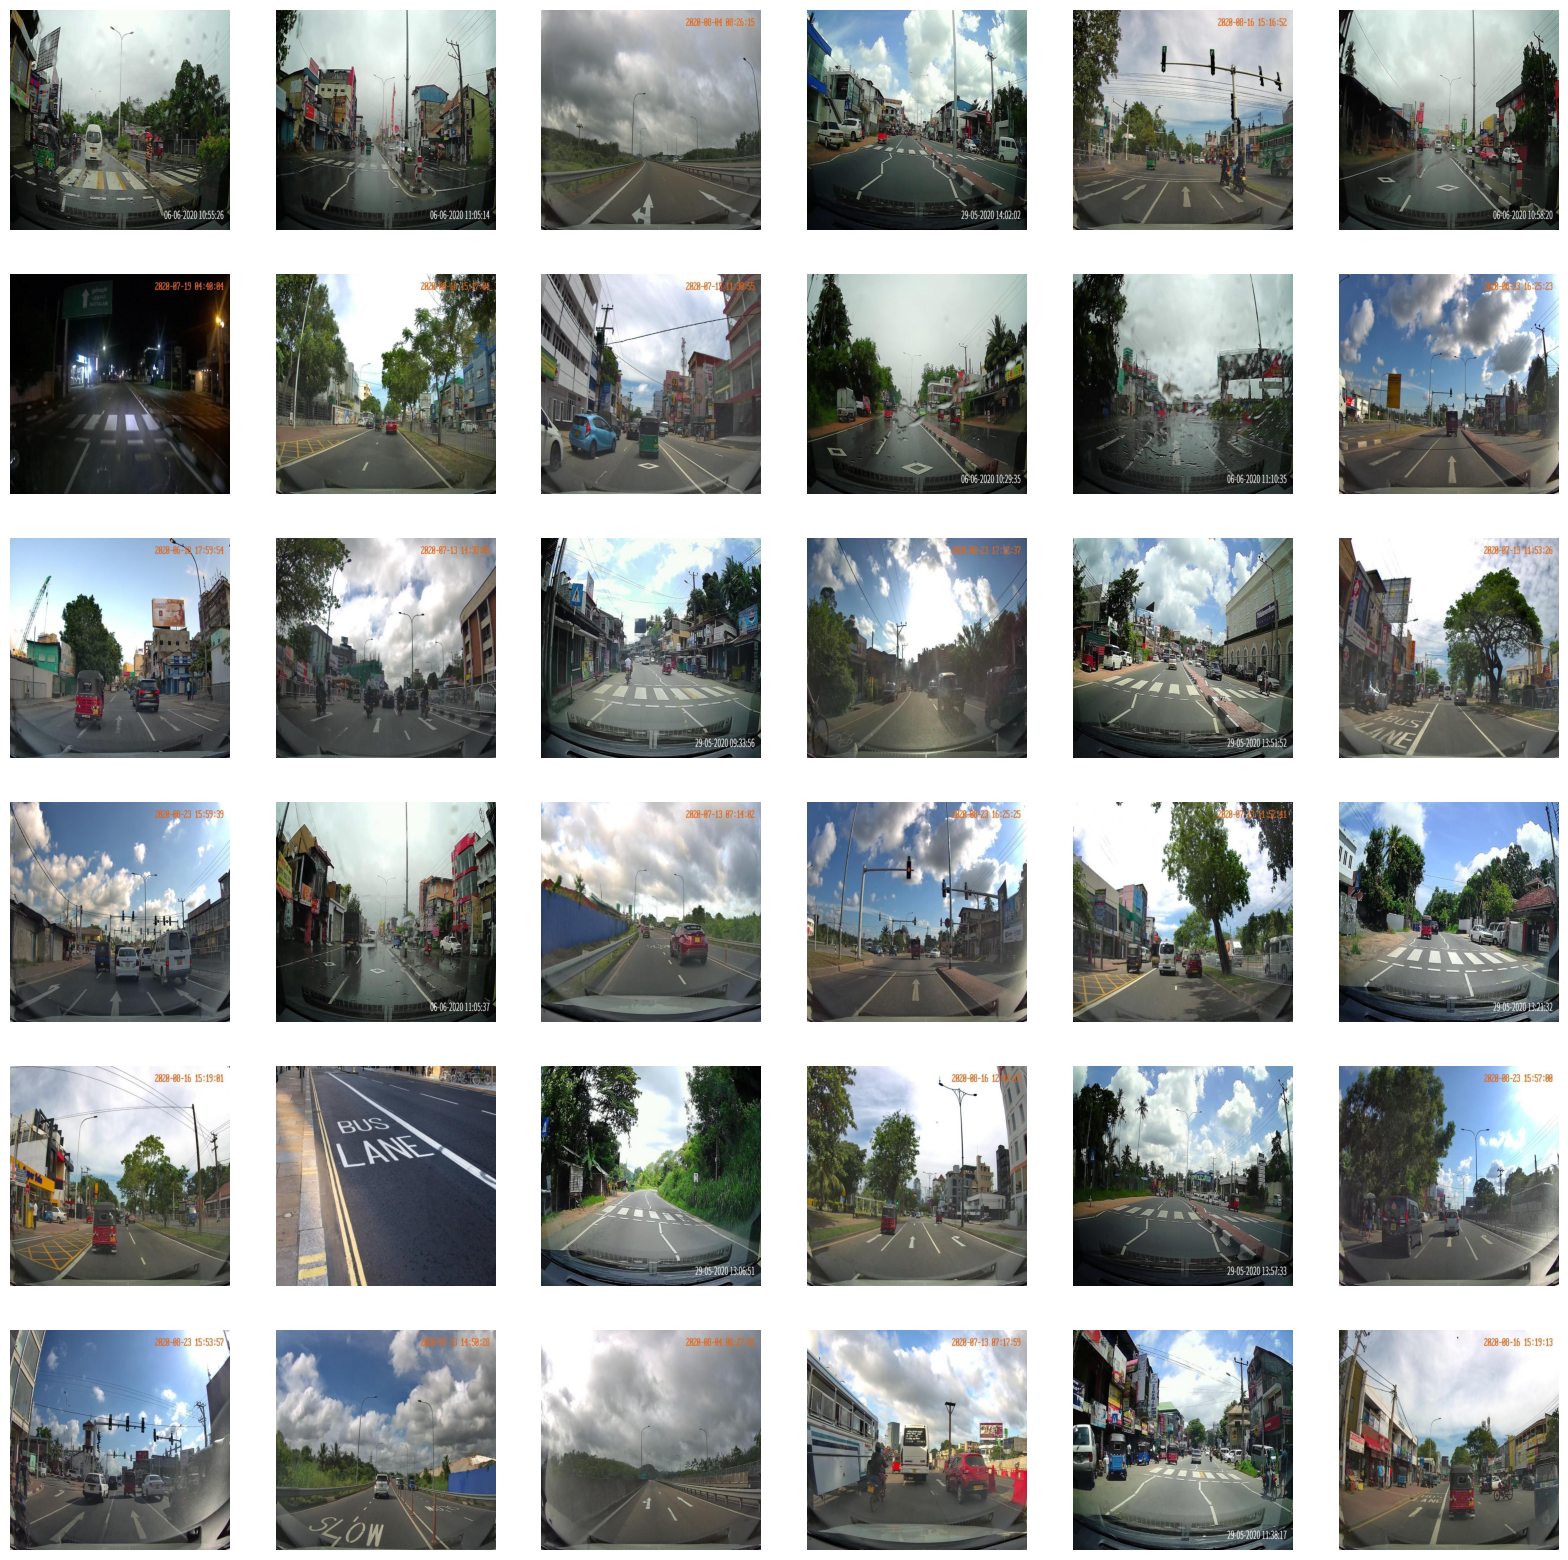

In [6]:
import random
import cv2
import os
import matplotlib.pyplot as plt

image_dir = 'train/images'
image_files = os.listdir(image_dir)
random_images = random.sample(image_files, 36)
label_files = 'train/labels'

fig, axs = plt.subplots(6, 6, figsize=(20, 20))

for i, image_file in enumerate(random_images):
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(label_files, label_file)
    
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")
    
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width / 2) * image.shape[1])
        y_min = int((y_center - height / 2) * image.shape[0])
        x_max = int((x_center + width / 2) * image.shape[1])
        y_max = int((y_center + height / 2) * image.shape[0])

        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

        text_scale = max(1.5, min(image.shape[1], image.shape[0]) / 700)
        text_thickness = max(1, int(text_scale * 4))
        classe = class_names[int(class_id)]
        cv2.putText(
            image,
            classe,
            (x_min, max(y_min - 10, 0)),
            cv2.FONT_HERSHEY_SIMPLEX,
            text_scale,
            (0, 0, 255),
            text_thickness,
            cv2.LINE_AA,
        )
    row = i // 6 
    col = i % 6  

    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()


In [ ]:
model.train(data ="data.yaml",epochs=32,optimizer='auto')

Ultralytics 8.3.128 🚀 Python-3.12.7 torch-2.7.0 CPU (Apple M2)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=32, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train9, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, re

train: Scanning /Users/jibink/Desktop/PROJECTS/Pinacle/Road_Lane_Lines/train/labels.cache... 2167 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2167/2167 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 249.4±126.6 MB/s, size: 60.5 KB)



val: Scanning /Users/jibink/Desktop/PROJECTS/Pinacle/Road_Lane_Lines/valid/labels.cache... 417 images, 1 backgrounds, 0 corrupt: 100%|██████████| 417/417 [00:00<?, ?it/s]

Plotting labels to /opt/homebrew/runs/detect/train9/labels.jpg... 


WARNING ⚠️ 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /opt/homebrew/runs/detect/train9
Starting training for 32 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/32         0G      2.461      4.164      2.128        115        640:  15%|█▍        | 20/136 [11:00<1:01:27, 31.79s/it]

In [ ]:
metrics = model.val(split='val')

print(f"Mean Average Precision @.5:.95 : {metrics.box.map}")    
print(f"Mean Average Precision @ .50   : {metrics.box.map50}") 
print(f"Mean Average Precision @ .70   : {metrics.box.map75}")
print("recall : ",metrics.box.r)
print(metrics.box.f1)
print(metrics.box.maps)

In [ ]:
from IPython.display import Image,display
path='/kaggle/working/runs/detect/train'
image=[f for f in os.listdir(path) if f.endswith(('.jpg','.png','.jpeg'))]
for i in image:
    display(Image(filename=path+'/'+i))

In [ ]:
#visualiser les resultats de prédiction de plusieurs images
image_dir = "/kaggle/input/dataset-english/archive/test/images"

all_images = os.listdir(image_dir)
selected_images = all_images[:45]

for img_name in selected_images:
    img_path = os.path.join(image_dir, img_name) 
    results = model.predict(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    for result in results:
        plotted_img = result.plot()
        plt.figure(figsize=(8, 6))  
        plt.imshow(plotted_img)    
        plt.axis('off')             
        plt.show() 